In [168]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [169]:
img = cv2.imread('images-16/original.jpg', 0)

In [170]:
def show_img_cv(img_title, img):
    cv2.imshow(img_title, img)
    cv2.waitKey(0)
    #cv2.destroyAllWindows()

In [172]:
def show_img_plt(img, c_map='gray',fig_hight=6, fig_width=4 ):
    plt.figure(figsize=(fig_hight, fig_width), dpi=100)
    plt.imshow(img, cmap=c_map)

True

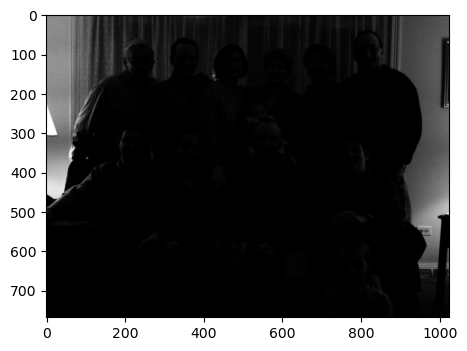

In [173]:
show_img_plt(img)
cv2.imwrite('original_image.jpg', img)

In [174]:
def display_hist_cv(img, channel=0, histsize=256, range=(0, 256)):
    hist_img = cv2.calcHist([img], [channel], None, [histsize], range)
    plt.figure(figsize=(4, 2), dpi=100)
    plt.plot(hist_img)
    plt.show()

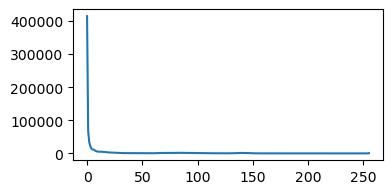

In [175]:
display_hist_cv(img)

In [176]:
def display_hist_plt(img, bins=256, range=(0, 256)):
    plt.figure(figsize=(4, 2), dpi=100)
    plt.hist(img.flat, bins=bins, range=range)
    plt.show()

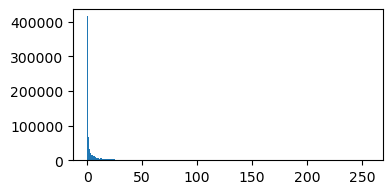

In [177]:
display_hist_plt(img)

## Contrast Stretching

In [178]:
min_new = 0
max_new = 255

min_old = np.min(img)
max_old = np.max(img)

cs_img = np.uint8(((img - min_old)/(max_old - min_old))*(max_new - min_new) + min_new)

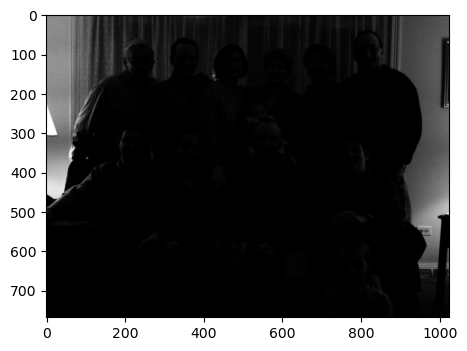

In [179]:
show_img_plt(cs_img)

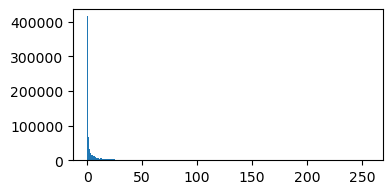

In [180]:
display_hist_plt(cs_img)

## Histogram Equalization

In [181]:
hisequ_img = cv2.equalizeHist(img)

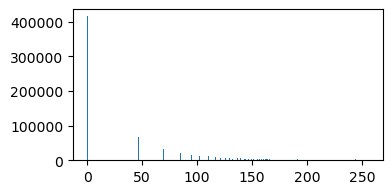

In [182]:
display_hist_plt(hisequ_img)

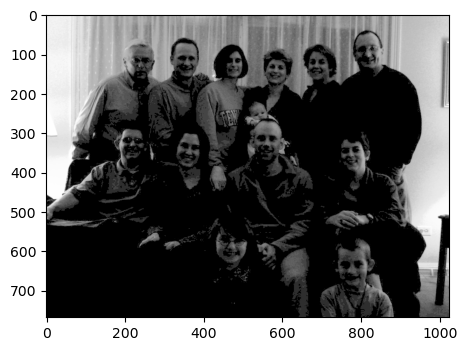

In [183]:
show_img_plt(hisequ_img) 

In [184]:
show_img_cv('hisequ_img that is output' , hisequ_img)


## Gamma

In [185]:
gamma = 0.3
gamma_img = np.uint8(((img/255)**gamma)*255)

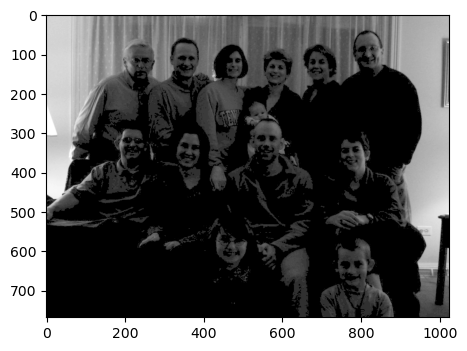

In [186]:
show_img_plt(gamma_img)

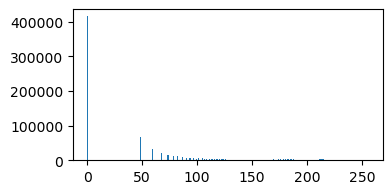

In [187]:
display_hist_plt(gamma_img)

In [188]:
test_heq = cv2.equalizeHist(gamma_img)

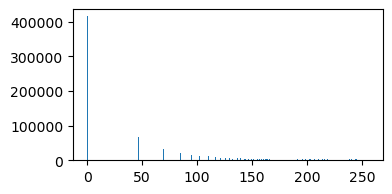

In [189]:
display_hist_plt(test_heq)

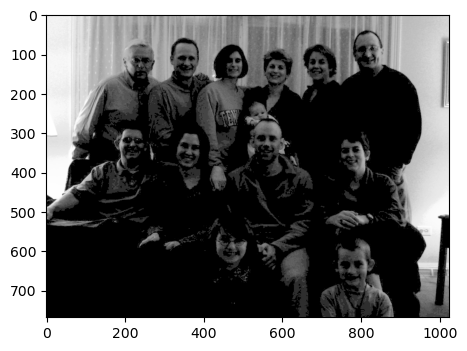

In [190]:
show_img_plt(test_heq)
 

In [191]:
show_img_cv('main gamma image after equalization', test_heq)

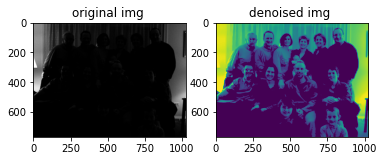

In [194]:
img = cv2.imread( 'images-16/original.jpg' )  
  
# denoising the image using the cv2.fastNlMeansDenoising() function  
dst = cv2.fastNlMeansDenoising( test_heq, None, 10, 10, 21 )  
  
# visualizing the image and comparing noisy image and image after denoising  
plt.subplot( 121 )  
plt.imshow( img )  
plt.title('original img ')  
plt.subplot( 122 )  
plt.imshow( dst )  
plt.title('denoised img ')  
plt.show()  

In [195]:
show_img_cv('after denoising', dst)